In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [2]:
# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print(f"Sample submission shape: {sample_submission.shape}")
print(f"\nTrain columns: {list(train.columns)}")
print(f"Test columns: {list(test.columns)}")
print(f"Sample submission columns: {list(sample_submission.columns)}")


DATASET OVERVIEW
Train shape: (269, 4)
Test shape: (264, 3)
Sample submission shape: (264, 2)

Train columns: ['id', 'topic', 'answer', 'is_cheating']
Test columns: ['id', 'topic', 'answer']
Sample submission columns: ['id', 'is_cheating']


In [4]:
train.head(10)

,id,topic,answer,is_cheating
0,scr_cd3edac7d322,A girl wakes from a dream and she is not sure ...,"My eyes flew open, and the air around me feels...",1
1,scr_86f1104afb28,A journalistic review piece about the top 6 ai...,Robot Butlers in the year of 2025. What are th...,0
2,scr_c461dafbe886,The influence of fictional universities in cam...,"In recent years, apparel featuring the names a...",1
3,scr_64880cce429f,Why do girls love horses,"The moment before I hit the dirt, I thought we...",0
4,scr_c7742a3b2444,"Every year, a remote mountain town elects a ne...","In the valley of Eldermist, were the mountains...",1
5,scr_3131e93dc7b3,True paranormal story from my childhood- the p...,The living room was dimly lit as I sat across ...,0
6,scr_8a34d79f2492,"This topic highlights how, even in brutal conf...",The rain fell relentlessly over the muddy batt...,0
7,scr_1fec328d54d9,Turning Failed Products Into Cult Classics,"In the fast-paced world of product innovation,...",1
8,scr_56bc0fb3bd1a,A blog post for new indie authors about whethe...,You've written the book. That's the hard part ...,0
9,scr_08d448a4bedb,A social media campaign for a health and welln...,Did you know that over 60% of women experience...,0


In [5]:
# Basic info and missing values
print("=" * 60)
print("MISSING VALUES")
print("=" * 60)
print("\nTrain:")
print(train.isnull().sum())
print("\nTest:")
print(test.isnull().sum())

print("\n" + "=" * 60)
print("DATA TYPES")
print("=" * 60)
print("\nTrain dtypes:")
print(train.dtypes)


MISSING VALUES

Train:
id             0
topic          0
answer         0
is_cheating    0
dtype: int64

Test:
id        0
topic     0
answer    0
dtype: int64

DATA TYPES

Train dtypes:
id             object
topic          object
answer         object
is_cheating     int64
dtype: object


TARGET DISTRIBUTION (is_cheating)
is_cheating
1    147
0    122
Name: count, dtype: int64

Percentage:
is_cheating
1    54.64684
0    45.35316
Name: proportion, dtype: float64


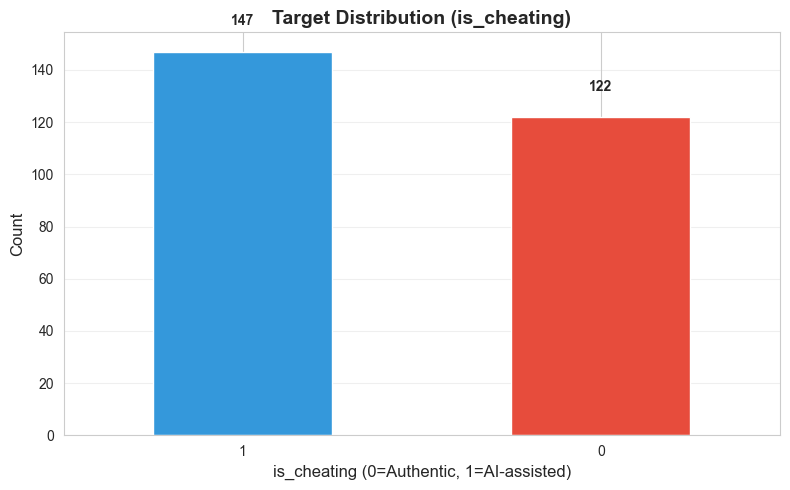

In [6]:
# Target distribution
print("=" * 60)
print("TARGET DISTRIBUTION (is_cheating)")
print("=" * 60)
target_dist = train['is_cheating'].value_counts()
print(target_dist)
print(f"\nPercentage:")
print(train['is_cheating'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 5))
train['is_cheating'].value_counts().plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title('Target Distribution (is_cheating)', fontsize=14, fontweight='bold')
plt.xlabel('is_cheating (0=Authentic, 1=AI-assisted)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(target_dist.values):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()


In [7]:
# Text statistics
print("=" * 60)
print("TEXT STATISTICS")
print("=" * 60)

# Calculate text features
train['text_length'] = train['answer'].str.len()
train['word_count'] = train['answer'].str.split().str.len()
train['char_count_no_spaces'] = train['answer'].str.replace(' ', '').str.len()
train['sentence_count'] = train['answer'].str.count(r'[.!?]+')

test['text_length'] = test['answer'].str.len()
test['word_count'] = test['answer'].str.split().str.len()
test['char_count_no_spaces'] = test['answer'].str.replace(' ', '').str.len()
test['sentence_count'] = test['answer'].str.count(r'[.!?]+')

# Summary statistics
text_features = ['text_length', 'word_count', 'char_count_no_spaces', 'sentence_count']
print("\nTrain - Text Statistics:")
print(train[text_features].describe())

print("\nTest - Text Statistics:")
print(test[text_features].describe())

# Compare by target
print("\n" + "=" * 60)
print("TEXT STATISTICS BY TARGET")
print("=" * 60)
print(train.groupby('is_cheating')[text_features].mean())


TEXT STATISTICS

Train - Text Statistics:
       text_length   word_count  char_count_no_spaces  sentence_count
count   269.000000   269.000000            269.000000      269.000000
mean   1053.052045   172.007435            882.330855       10.825279
std     676.411116   121.382306            558.251787        9.224155
min     142.000000    24.000000            119.000000        1.000000
25%     803.000000   140.000000            662.000000        6.000000
50%     983.000000   149.000000            827.000000        8.000000
75%    1084.000000   157.000000            928.000000       12.000000
max    6306.000000  1102.000000           5203.000000       76.000000

Test - Text Statistics:
       text_length  word_count  char_count_no_spaces  sentence_count
count   264.000000  264.000000            264.000000      264.000000
mean   1068.920455  173.844697            897.708333       11.113636
std     581.026819  101.002252            483.845891        8.542578
min     138.000000   21.000

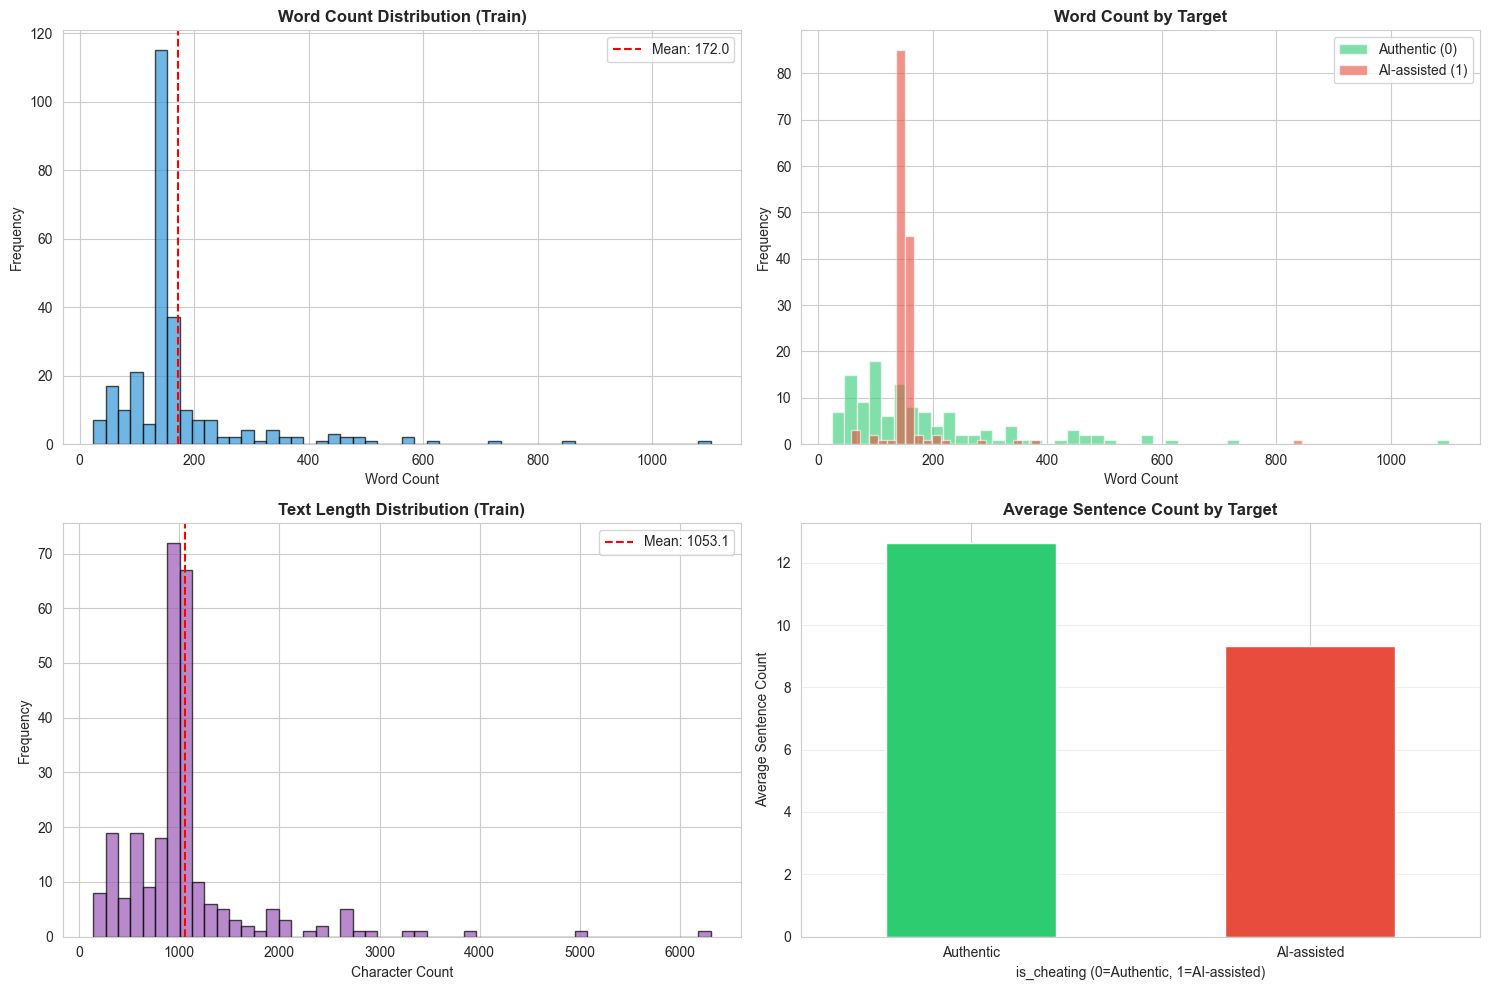

In [8]:
# Visualizations: Text length distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Word count distribution
axes[0, 0].hist(train['word_count'], bins=50, alpha=0.7, color='#3498db', edgecolor='black')
axes[0, 0].set_title('Word Count Distribution (Train)', fontweight='bold')
axes[0, 0].set_xlabel('Word Count')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(train['word_count'].mean(), color='red', linestyle='--', label=f'Mean: {train["word_count"].mean():.1f}')
axes[0, 0].legend()

# Word count by target
train[train['is_cheating']==0]['word_count'].hist(ax=axes[0, 1], bins=50, alpha=0.6, label='Authentic (0)', color='#2ecc71')
train[train['is_cheating']==1]['word_count'].hist(ax=axes[0, 1], bins=50, alpha=0.6, label='AI-assisted (1)', color='#e74c3c')
axes[0, 1].set_title('Word Count by Target', fontweight='bold')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Text length distribution
axes[1, 0].hist(train['text_length'], bins=50, alpha=0.7, color='#9b59b6', edgecolor='black')
axes[1, 0].set_title('Text Length Distribution (Train)', fontweight='bold')
axes[1, 0].set_xlabel('Character Count')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(train['text_length'].mean(), color='red', linestyle='--', label=f'Mean: {train["text_length"].mean():.1f}')
axes[1, 0].legend()

# Sentence count by target
train.groupby('is_cheating')['sentence_count'].mean().plot(kind='bar', ax=axes[1, 1], color=['#2ecc71', '#e74c3c'])
axes[1, 1].set_title('Average Sentence Count by Target', fontweight='bold')
axes[1, 1].set_xlabel('is_cheating (0=Authentic, 1=AI-assisted)')
axes[1, 1].set_ylabel('Average Sentence Count')
axes[1, 1].set_xticklabels(['Authentic', 'AI-assisted'], rotation=0)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [9]:
# Topic analysis
print("=" * 60)
print("TOPIC ANALYSIS")
print("=" * 60)

print(f"\nUnique topics in train: {train['topic'].nunique()}")
print(f"Unique topics in test: {test['topic'].nunique()}")
print(f"Common topics: {len(set(train['topic'].unique()) & set(test['topic'].unique()))}")

# Top topics
print("\nTop 10 Topics in Train:")
print(train['topic'].value_counts().head(10))

# Topic distribution by target
print("\n" + "=" * 60)
print("TOPIC DISTRIBUTION BY TARGET")
print("=" * 60)
topic_target = pd.crosstab(train['topic'], train['is_cheating'], margins=True)
print(topic_target.sort_values('All', ascending=False).head(15))

# Topics with highest AI-cheating rate
topic_cheating_rate = train.groupby('topic')['is_cheating'].agg(['mean', 'count']).sort_values('mean', ascending=False)
print("\n" + "=" * 60)
print("TOPICS WITH HIGHEST AI-CHEATING RATE (min 5 samples)")
print("=" * 60)
print(topic_cheating_rate[topic_cheating_rate['count'] >= 5].head(10))


TOPIC ANALYSIS

Unique topics in train: 268
Unique topics in test: 264
Common topics: 1

Top 10 Topics in Train:
topic
Fiction                                                                                                                                              2
A marketing email campaign targeting school districts to promote an new education software aimed at enhancing how technology is used in teaching.    1
The use of 'found footage' style in social media advertising                                                                                         1
The scene is two competing NASCAR drivers walking out onto the raceway prior to the race.                                                            1
The secret language of railroad hobos in 1920s America                                                                                               1
The rise and fall of ice delivery businesses before refrigeration                                                             

In [10]:
# Sample texts
print("=" * 60)
print("SAMPLE TEXTS")
print("=" * 60)

print("\n--- Sample AUTHENTIC text (is_cheating=0) ---")
sample_authentic = train[train['is_cheating']==0].iloc[0]
print(f"Topic: {sample_authentic['topic']}")
print(f"Word count: {sample_authentic['word_count']}")
print(f"Text preview: {sample_authentic['answer'][:300]}...")

print("\n--- Sample AI-ASSISTED text (is_cheating=1) ---")
sample_ai = train[train['is_cheating']==1].iloc[0]
print(f"Topic: {sample_ai['topic']}")
print(f"Word count: {sample_ai['word_count']}")
print(f"Text preview: {sample_ai['answer'][:300]}...")


SAMPLE TEXTS

--- Sample AUTHENTIC text (is_cheating=0) ---
Topic: A journalistic review piece about the top 6 ai robot butlers available on the market
Word count: 63
Text preview: Robot Butlers in the year of 2025. What are they, what do they do, and where can you get one?

In this short article, we bring the future into the present and review the top 6 AI robot butlers available on the market in 2025 and go through the top brands, models, their cost, and where you can buy on...

--- Sample AI-ASSISTED text (is_cheating=1) ---
Topic: A girl wakes from a dream and she is not sure if it is real
Word count: 183
Text preview: My eyes flew open, and the air around me feels colder than it should. For a moment I'm not sure where I am. I can still smell the sea air, and feel the icy rain blasting agains my face. He had been there beside me, sharp blue eyes, and long hair blowing in the storm. 

I blink again and wrap my blan...


In [11]:
# Summary statistics comparison
print("=" * 60)
print("SUMMARY: KEY INSIGHTS")
print("=" * 60)
print(f"1. Training samples: {len(train):,}")
print(f"2. Test samples: {len(test):,}")
print(f"3. Class balance: {train['is_cheating'].value_counts(normalize=True)[0]*100:.1f}% authentic, {train['is_cheating'].value_counts(normalize=True)[1]*100:.1f}% AI-assisted")
print(f"4. Average word count - Authentic: {train[train['is_cheating']==0]['word_count'].mean():.1f}, AI-assisted: {train[train['is_cheating']==1]['word_count'].mean():.1f}")
print(f"5. Average text length - Authentic: {train[train['is_cheating']==0]['text_length'].mean():.1f}, AI-assisted: {train[train['is_cheating']==1]['text_length'].mean():.1f}")
print(f"6. Unique topics: {train['topic'].nunique()} in train, {test['topic'].nunique()} in test")
print(f"7. Missing values: Train={train.isnull().sum().sum()}, Test={test.isnull().sum().sum()}")


SUMMARY: KEY INSIGHTS
1. Training samples: 269
2. Test samples: 264
3. Class balance: 45.4% authentic, 54.6% AI-assisted
4. Average word count - Authentic: 190.1, AI-assisted: 157.0
5. Average text length - Authentic: 1080.1, AI-assisted: 1030.6
6. Unique topics: 268 in train, 264 in test
7. Missing values: Train=0, Test=0
